In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()


,Unnamed: 0,Job Title,Salary Estimate,Job Function,Job Description,Company Name,Rating,Location,Size,Founded,...,min_salary,max_salary,average_salary,job_state,company_age,python,R studio,SQL,Power BI,Excel
0,0,Data Scientist,Employer Provided Salary:$150K,Data Scientist,We are adding a Data Scientist to our growing ...,American Capital Group,4.3,"Bellevue, WA",51 to 200 Employees,1986,...,150,150,150.0,WA,35,0,0,0,0,0
1,8,Predictive Modeler,Employer Provided Salary:$75K - $125K,Data Modeler,"Predictive Modeler\nLancer Insurance Company, ...",Lancer Insurance Company,3.3,Remote,201 to 500 Employees,1985,...,75,125,100.0,Remote,36,0,0,0,0,0
2,10,Associate Data Scientist,Employer Provided Salary:$44 Per Hour,Data Scientist,"ASSOCIATE DATA SCIENTIST\nOur client, a leadin...",Motus Recruiting and Staffing,4.0,"East Portland, OR",51 to 200 Employees,2005,...,44,44,44.0,OR,16,0,0,0,0,0
3,11,"Sr. Data Scientist, Expansion",Employer Provided Salary:$142K,Data Scientist,Slack is hiring an experienced data scientist ...,Slack,4.7,"Denver, CO",1001 to 5000 Employees,2014,...,142,142,142.0,CO,7,0,0,0,0,0
4,12,Senior Data Analyst,Employer Provided Salary:$91K - $133K,Data Analyst,About Us\nWe want to help small businesses win...,Funding Circle US,3.9,"Denver, CO",501 to 1000 Employees,2010,...,91,133,112.0,CO,11,0,0,0,0,0


In [4]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Function',
       'Job Description', 'Company Name', 'Rating', 'Location', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'job_state', 'company_age', 'python', 'R studio',
       'SQL', 'Power BI', 'Excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Seattle

##  Job description length 

##  Industry count

## hourly wage to annual 

#remove new line from job title

In [6]:
df['job_sim'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_sim.value_counts()

data scientist    24
na                 6
mle                3
analyst            3
data engineer      2
Name: job_sim, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)


In [9]:
#Fix state Seattle
df['job state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'Seattle' else 'WA')
df.job_state.value_counts()
df.drop('job state', inplace = True, axis =1)

In [10]:
##  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      581
1      820
2     1501
3     1026
4      774
5      698
6      985
7     3170
8     5882
9     1831
10     551
11     746
12     648
13    1095
14     295
15    1070
16     819
17     749
18     268
19     571
20    1134
21     748
22     655
23     836
24     455
25    1021
26     750
27    1441
28    5500
29    2778
30    1806
31     707
32     683
33     581
34     698
35     581
36     698
37     581
Name: desc_len, dtype: int64

In [11]:
##  Industry count. This shows what type of companies are looking for data scientists
df['Industry'].value_counts()


Staffing & Outsourcing                     10
IT Services                                 7
-1                                          4
Real Estate                                 4
Internet                                    3
Research & Development                      2
Federal Agencies                            2
Consulting                                  2
Enterprise Software & Network Solutions     1
Investment Banking & Asset Management       1
Lending                                     1
Insurance Carriers                          1
Name: Industry, dtype: int64

In [12]:
## hourly wage to annual

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)
df[df.hourly == 1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
2,1,88,88
11,1,58,58
12,1,96,116
13,1,134,140
16,1,134,134
17,1,174,212
20,1,106,110
22,1,116,116
24,1,144,154
26,1,174,212


In [13]:
df.columns


Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Function',
       'Job Description', 'Company Name', 'Rating', 'Location', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'job_state', 'company_age', 'python', 'R studio',
       'SQL', 'Power BI', 'Excel', 'job_sim', 'seniority', 'desc_len'],
      dtype='object')

In [14]:
#remove new line from job title
df['Company Name'] = df['Company Name'].apply(lambda x: x.replace('\n', ''))
df['Company Name']

0                   American Capital Group
1                 Lancer Insurance Company
2            Motus Recruiting and Staffing
3                                    Slack
4                        Funding Circle US
5                              Sphere Inc.
6                  #twiceasnice Recruiting
7                 National Security Agency
8                 National Security Agency
9                                   Toptal
10                     Cameron Craig Group
11                              Enhance IT
12              Beacon Hill Staffing Group
13                          Insight Global
14                                   Kelly
15                      Boom Entertainment
16                             Brooksource
17               Toyota Research Institute
18                           Venturi Group
19                                 Harnham
20                               eTeam Inc
21                          Warman O'Brien
22       Computer Enterprises Incorporated
23         

In [15]:
df.describe()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,average_salary,company_age,python,R studio,SQL,Power BI,Excel,desc_len
count,38.000000,38.000000,38.000000,38.000000,38.0,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,38.0,38.0,38.0,38.000000
mean,68.526316,4.113158,1575.184211,0.315789,1.0,120.342105,147.500000,113.578947,20.131579,0.105263,0.0,0.0,0.0,0.0,1203.500000
std,62.997099,0.512108,825.008267,0.471069,0.0,30.932600,44.680699,41.852302,18.688298,0.311012,0.0,0.0,0.0,0.0,1227.132865
min,0.000000,3.000000,-1.000000,0.000000,1.0,50.000000,58.000000,29.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,268.000000
25%,30.000000,3.800000,1954.250000,0.000000,1.0,100.000000,125.000000,76.625000,5.250000,0.000000,0.0,0.0,0.0,0.0,649.750000
50%,51.500000,4.000000,1993.000000,0.000000,1.0,120.000000,141.500000,116.000000,16.000000,0.000000,0.0,0.0,0.0,0.0,749.500000
75%,73.500000,4.400000,2005.000000,1.000000,1.0,143.500000,150.000000,141.500000,29.000000,0.000000,0.0,0.0,0.0,0.0,1088.750000
max,241.000000,5.000000,2016.000000,1.000000,1.0,183.000000,300.000000,193.000000,75.000000,1.000000,0.0,0.0,0.0,0.0,5882.000000


In [16]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Function',
       'Job Description', 'Company Name', 'Rating', 'Location', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'job_state', 'company_age', 'python', 'R studio',
       'SQL', 'Power BI', 'Excel', 'job_sim', 'seniority', 'desc_len'],
      dtype='object')

<AxesSubplot:>

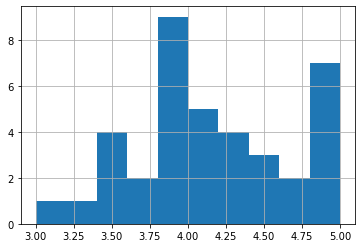

In [17]:
#histogram for ratings on 5 star scale
df.Rating.hist()

<AxesSubplot:>

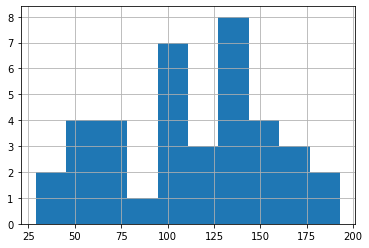

In [18]:
df.average_salary.hist()

<AxesSubplot:>

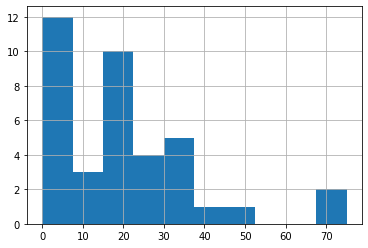

In [19]:
df.company_age.hist()

<AxesSubplot:>

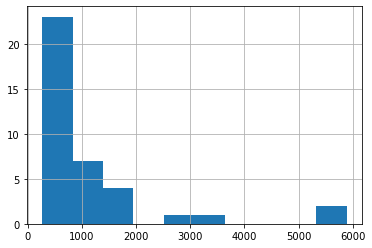

In [20]:
df.desc_len.hist()

<AxesSubplot:>

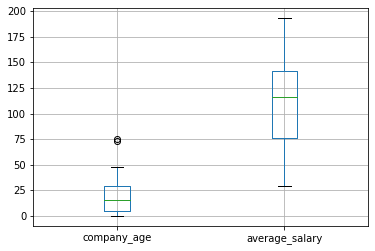

In [21]:
df.boxplot(column = ['company_age', 'average_salary'])

<AxesSubplot:>

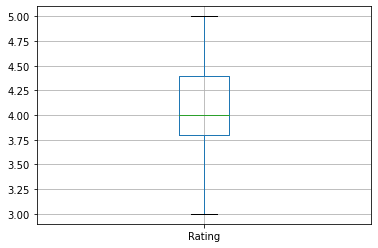

In [22]:
df.boxplot(column = 'Rating')

In [23]:
#correlations
df[['company_age', 'average_salary', 'Rating','desc_len']].corr()

,company_age,average_salary,Rating,desc_len
company_age,1.000000,0.048657,-0.177816,-0.147732
average_salary,0.048657,1.000000,0.223338,0.082161
Rating,-0.177816,0.223338,1.000000,-0.368771
desc_len,-0.147732,0.082161,-0.368771,1.000000


<AxesSubplot:>

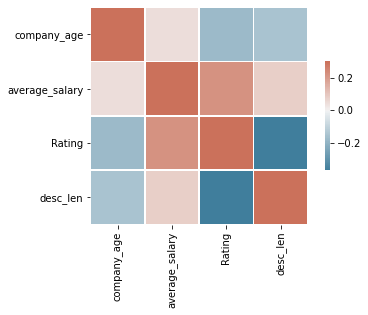

In [24]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df[['company_age', 'average_salary', 'Rating','desc_len', 'Industry']].corr(), vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

So it looks like the strongest relations are:

Average salary/Rating

Average salary/company age

Average salary/description length


In [25]:
#Categorical Variables
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Function',
       'Job Description', 'Company Name', 'Rating', 'Location', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'job_state', 'company_age', 'python', 'R studio',
       'SQL', 'Power BI', 'Excel', 'job_sim', 'seniority', 'desc_len'],
      dtype='object')

In [26]:
df_cat = df[['Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company Name', 'job_state', 'python', 'R studio', 'SQL', 'Power BI',
       'Excel', 'job_sim', 'seniority']]

graph for Location: total = 18


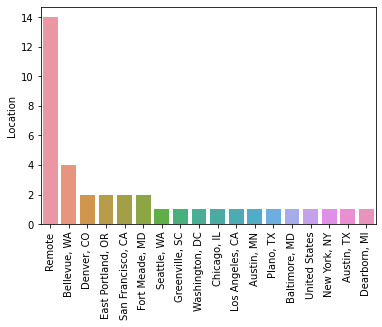

graph for Size: total = 8


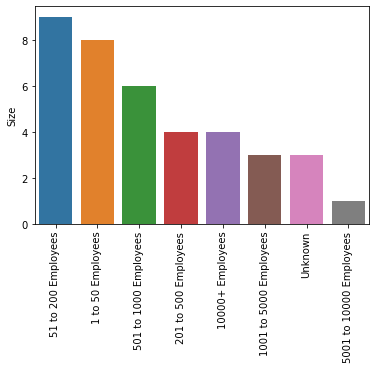

graph for Type of ownership: total = 4


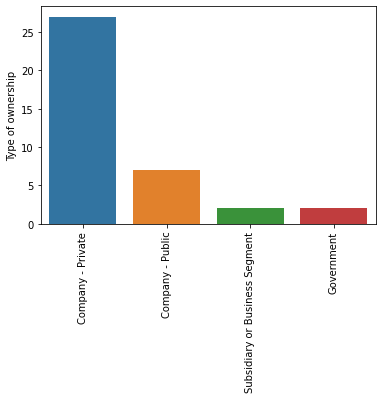

graph for Industry: total = 12


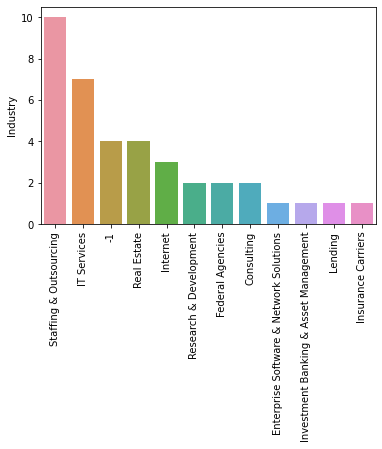

graph for Sector: total = 7


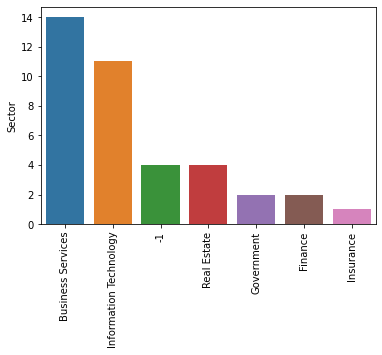

graph for Revenue: total = 10


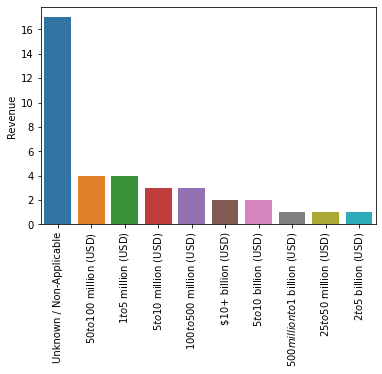

graph for Company Name: total = 30


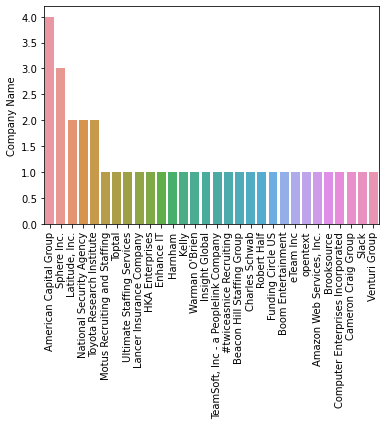

graph for job_state: total = 14


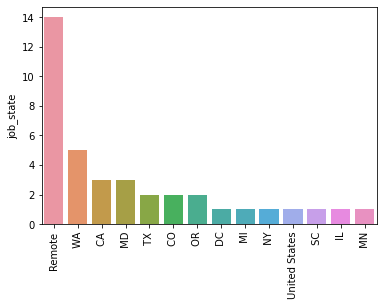

graph for python: total = 2


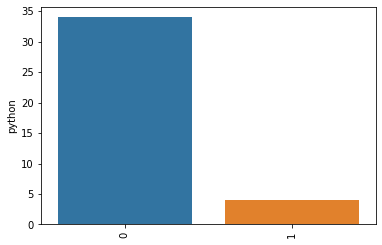

graph for R studio: total = 1


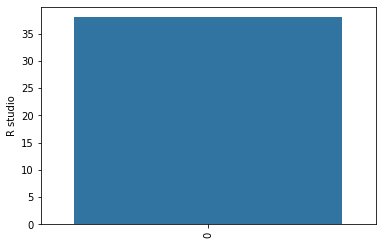

graph for SQL: total = 1


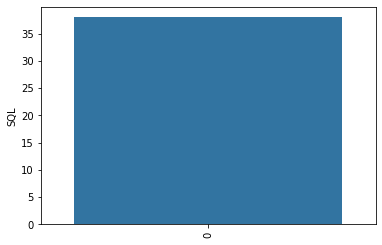

graph for Power BI: total = 1


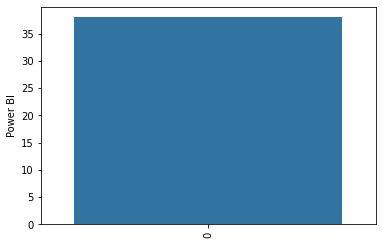

graph for Excel: total = 1


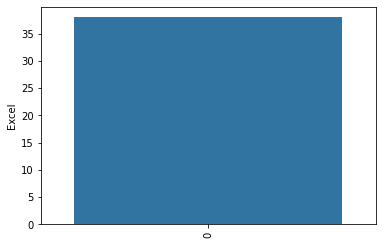

graph for job_sim: total = 5


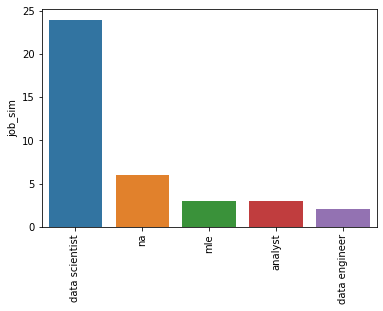

graph for seniority: total = 2


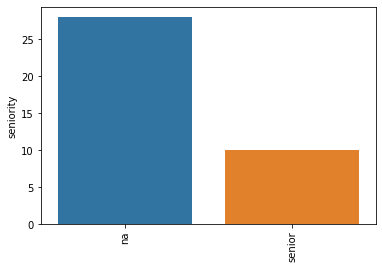

In [27]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x= cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 5


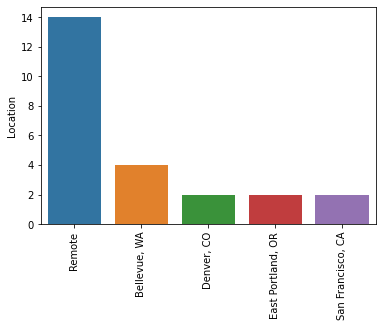

graph for Industry: total = 5


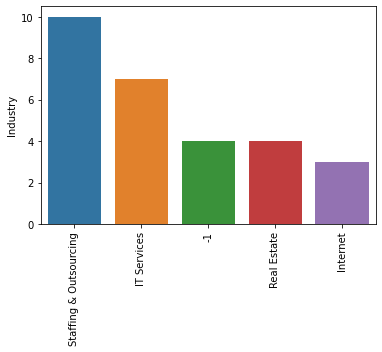

graph for Company Name: total = 5


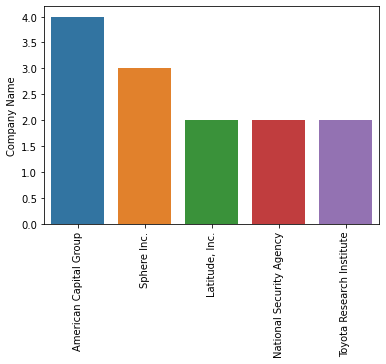

In [28]:
for i in df_cat[['Location', 'Industry', 'Company Name']].columns:
    cat_num = df_cat[i].value_counts()[:5]
    print('graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x= cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [29]:
#pivot tables
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Function',
       'Job Description', 'Company Name', 'Rating', 'Location', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'job_state', 'company_age', 'python', 'R studio',
       'SQL', 'Power BI', 'Excel', 'job_sim', 'seniority', 'desc_len'],
      dtype='object')

In [30]:
pd.pivot_table(df, index = 'job_sim', values = 'average_salary')

,average_salary
job_sim,
analyst,86.833333
data engineer,96.500000
data scientist,114.479167
mle,103.666667
na,134.000000


So analysts make less than scientists

In [31]:
pd.pivot_table(df, index = ['job_sim', 'seniority'], values = 'average_salary')

average_salary
job_sim        seniority                
analyst        senior          86.833333
data engineer  na              96.500000
data scientist na             111.550000
               senior         129.125000
mle            na             103.666667
na             na             135.500000
               senior         132.500000

And it laso looks like senior level positions earn more salary, as expected

In [32]:
pd.pivot_table(df, index = 'job_state', values = 'average_salary').sort_values('average_salary', ascending = False)

,average_salary
job_state,
NY,167.500000
CA,166.000000
MD,144.833333
IL,140.000000
WA,139.300000
CO,127.000000
MI,123.500000
MN,110.000000
DC,105.000000


The general roles in NY is making the most, while those in SC make the least. WA seems to be just above average

In [33]:
pd.pivot_table(df, index = ['job_state','job_sim'], values = 'average_salary').sort_values('job_state', ascending = False)

average_salary
job_state     job_sim                       
United States data scientist       29.000000
Remote        na                  124.375000
              mle                 103.666667
              data scientist       82.083333
              analyst              74.500000
 WA           data scientist      150.000000
              data engineer        96.500000
 TX           data scientist      110.000000
              analyst              74.000000
 SC           data scientist       58.000000
 OR           data scientist       44.000000
              data engineer        96.500000
 NY           data scientist      167.500000
 MN           data scientist      110.000000
 MI           na                  123.500000
 MD           na                  183.000000
              data scientist      125.750000
 IL           data scientist      140.000000
 DC           data scientist      105.000000
 CO           analyst             112.000000
              data scientist      142.000000
 CA           data scientist      166.000000

In [34]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [35]:
pd.pivot_table(df, index = ['job_state','job_sim'], values = 'average_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

average_salary
job_state     job_sim                       
United States data scientist               1
Remote        na                           4
              mle                          3
              data scientist               6
              analyst                      1
 WA           data scientist               4
              data engineer                1
 TX           data scientist               1
              analyst                      1
 SC           data scientist               1
 OR           data scientist               1
              data engineer                1
 NY           data scientist               1
 MN           data scientist               1
 MI           na                           1
 MD           na                           1
              data scientist               2
 IL           data scientist               1
 DC           data scientist               1
 CO           analyst                      1
              data scientist               1
 CA           data scientist               3

Due to the pandemic at this time, it looks like most jobs are proportion to remote positions. WA seems to be looking for the most data scientists

In [36]:
pd.pivot_table(df[df.job_sim == 'data scientist'], index = 'job_state', values = 'average_salary').sort_values('average_salary', ascending = False)

,average_salary
job_state,
NY,167.500000
CA,166.000000
WA,150.000000
CO,142.000000
IL,140.000000
MD,125.750000
MN,110.000000
TX,110.000000
DC,105.000000


For data scientist roles specifically, NY is leading with WA in the third place. OR state paying the list

In [37]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Function',
       'Job Description', 'Company Name', 'Rating', 'Location', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'job_state', 'company_age', 'python', 'R studio',
       'SQL', 'Power BI', 'Excel', 'job_sim', 'seniority', 'desc_len'],
      dtype='object')

In [38]:
# rating, industry, sector, revenue, hourly, employer provided, python, r, SQL, 'Power BI', Excel, desc_len, type of ownership

df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python', 'R studio',
       'SQL', 'Power BI', 'Excel', 'desc_len', 'Type of ownership', 'average_salary']]

In [39]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'average_salary').sort_values('average_salary', ascending = False))

Rating
        average_salary
Rating                
4.3         150.000000
4.8         141.250000
3.5         132.125000
5.0         126.750000
4.4         114.333333
4.9         110.000000
4.7         108.250000
4.0         106.875000
3.0         105.000000
3.9         103.833333
3.3         100.000000
3.6          84.000000
3.8          74.000000
4.1          54.000000
Industry
                                         average_salary
Industry                                               
Investment Banking & Asset Management        193.000000
Federal Agencies                             157.250000
Real Estate                                  150.000000
Consulting                                   145.000000
Internet                                     133.333333
Lending                                      112.000000
Enterprise Software & Network Solutions      110.000000
Insurance Carriers                           100.000000
Staffing & Outsourcing                        98.150000


ValueError: Grouper for 'average_salary' not 1-dimensional

The best paid attributes for each categories are:

Ratings of 4.3 and above

Investment Banking & Asset Management  

Government Sector

Company revenue of $25 to $50 million (USD) 

Non-hourly positions

Python-based

In [40]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'average_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $5 million (USD),4.0,NaN
$10+ billion (USD),1.0,1.0
$100 to $500 million (USD),3.0,NaN
$2 to $5 billion (USD),NaN,1.0
$25 to $50 million (USD),1.0,NaN
$5 to $10 billion (USD),1.0,1.0
$5 to $10 million (USD),3.0,NaN
$50 to $100 million (USD),3.0,1.0
$500 million to $1 billion (USD),1.0,NaN


It also looks like not a lot of these companies are looking for candidates with python experiece. This might be different if the original data was bigger (Went from 250 to 38)

In [55]:
!pip install wordcloud
!pip install --user -U nltk
!pip install numpy
import nltk
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

Requirement already up-to-date: nltk in c:\users\seong\appdata\roaming\python\python38\site-packages (3.6.2)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Seong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Seong\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

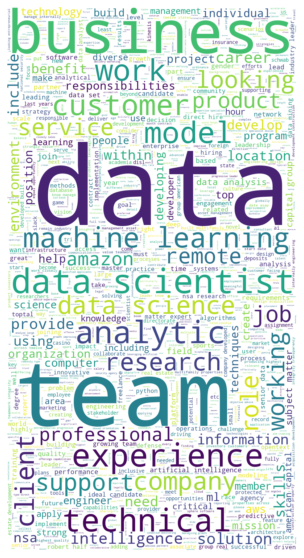

In [56]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()